In [1]:
import numpy as np
import pandas as pd
from fcmeans import FCM
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df = pd.read_excel('amino_acids_descriptors_reduced_normalized.xlsx')


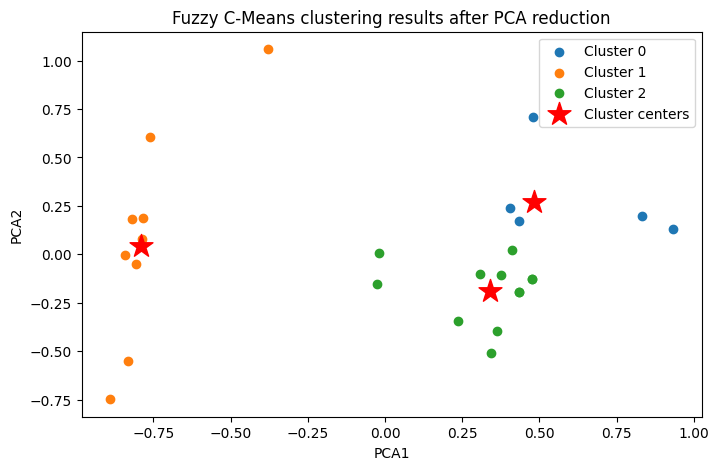

In [2]:
df.dropna(inplace=True)

data = df.iloc[:, 1:].values

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

n_clusters = 3

fcm = FCM(n_clusters=n_clusters)
fcm.fit(data_2d)

centers = fcm.centers
labels = fcm.u.argmax(axis=1)

plt.figure(figsize=(8, 5))
for i in range(n_clusters):
    plt.scatter(data_2d[labels == i, 0], data_2d[labels == i, 1], label=f'Cluster {i}')
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='*', label='Cluster centers')
plt.title('Fuzzy C-Means clustering results after PCA reduction')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()